In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, BatchNormalization
from keras import regularizers
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import cv2
import os
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from google.colab import files
import csv
import pandas as pd
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image 
from keras.utils import plot_model

print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [2]:
uploaded = files.upload()

Saving data.zip to data.zip
Saving fami_train_set.csv to fami_train_set.csv
Saving fami_valid_set.csv to fami_valid_set.csv
Saving valid.zip to valid.zip


In [0]:
#!rm  -r data/
#!rm  -r valid/
#!rm data.zip
#!rm valid.zip
#!rm  fami_train_set.csv
!rm fami_valid_set.csv

In [3]:
!unzip data.zip
!unzip valid.zip

Archive:  data.zip
  inflating: data/1.jpg              
  inflating: data/10.jpg             
  inflating: data/100.jpg            
  inflating: data/1000.jpg           
  inflating: data/1001.jpg           
  inflating: data/1002.jpg           
  inflating: data/1003.jpg           
  inflating: data/1004.jpg           
  inflating: data/1005.jpg           
  inflating: data/1006.jpg           
  inflating: data/1007.jpg           
  inflating: data/1008.jpg           
  inflating: data/1009.jpg           
  inflating: data/101.jpg            
  inflating: data/1010.jpg           
  inflating: data/1011.jpg           
  inflating: data/1012.jpg           
  inflating: data/1013.jpg           
  inflating: data/1014.jpg           
  inflating: data/1015.jpg           
  inflating: data/1016.jpg           
  inflating: data/1017.jpg           
  inflating: data/1018.jpg           
  inflating: data/1019.jpg           
  inflating: data/102.jpg            
  inflating: data/1020.jpg     

In [0]:
!mkdir a

In [0]:
!ls data

In [0]:
Image.open('data/99.jpg')


In [0]:
img = cv2.imread("data/1.jpg")
print(img.shape)

(40, 80, 3)


In [0]:
#------------------------全家版本----------------------------
LETTERSTRN = "23456789ABCDEFGHJKLMNOPRSTVWXY"
  
def toonehot(text):
    labellist = []
    for letter in text:
        onehot = [0 for _ in range(30)]
        num = LETTERSTRN.find(letter)
        onehot[num] = 1
        labellist.append(onehot)
    return labellist

In [0]:
for index in range(1, 100, 1):
    image = Image.open("data/" + str(index) + ".jpg") # 讀取圖片
    nparr = np.array(image) # 轉成np array   
    nparr = nparr / 255.0
    #nparr = np.repeat(nparr[...,None],3,axis=2)
    print(nparr.shape)

In [5]:
print("Reading training data...")
traincsv = open('fami_train_set.csv', 'r', encoding = 'utf8')
train_data = np.stack([np.array(Image.open('data/' + str(i) + ".jpg"))/255.0 for i in range(1, 4001)])
#traincsv = pd.read_csv("toeic_train_set.csv" ,dtype={'B':str})
read_label = [toonehot(row[1]) for row in csv.reader(traincsv)][:4000]
print(read_label)
train_label = [[] for _ in range(4)]
for arr in read_label:
    for index in range(4):
        train_label[index].append(arr[index])
train_label = [arr for arr in np.asarray(train_label)]
print("Shape of train data:", train_data.shape)


Reading training data...
[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [6]:
print("Reading validation data...")
valicsv = open('fami_valid_set.csv', 'r', encoding = 'utf8')
vali_data = np.stack([np.array(Image.open('valid/' + str(i) + ".jpg"))/255.0 for i in range(1, 201)])
#valicsv = open('valid_set.csv', 'r', encoding = 'utf8')
read_label = [toonehot(row[1]) for row in csv.reader(valicsv)][:200]

vali_label = [[] for _ in range(4)]

for arr in read_label:
    for index in range(4):
        vali_label[index].append(arr[index])
vali_label = [arr for arr in np.asarray(vali_label)]

print(vali_label)
print("Shape of validation data:", vali_data.shape)

Reading validation data...
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])]
Shape of validation data: (200, 40, 100, 4)


In [7]:
keras.backend.clear_session()

# Create CNN Model
print("Creating CNN model...")
c = Input((40, 100, 4))
out = c
out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.6)(out)

out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)

out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.6)(out)

out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)

out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Dropout(0.6)(out) 

out = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(out)

out = BatchNormalization()(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
out = Dropout(0.6)(out)

#out = Dense(1024, activation='relu')(out)
#out = Dropout(0.3)(out) 
#out = Dense(512, activation='relu')(out)
#out = Dropout(0.3)(out)

#out = [Dense(36, name='digit1', activation='softmax')(out),\
#    Dense(36, name='digit2', activation='softmax')(out),\
#    Dense(36, name='digit3', activation='softmax')(out),\
#    Dense(36, name='digit4', activation='softmax')(out)]


output1 = Dense(30, name='digit1', activation='softmax')(out) 
output2 = Dense(30, name='digit2', activation='softmax')(out)
output3 = Dense(30, name='digit3', activation='softmax')(out)
output4 = Dense(30, name='digit4', activation='softmax')(out)

 
model = Model(inputs=c, outputs=[output1, output2, output3,output4])
#model = Model(inputs=a, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()






Creating CNN model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 100, 4)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 100, 32)  1184        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 40, 100, 32)  9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 100, 32)  128         conv2d_2[0][0]                   
_______________________________________________________________________________________

In [8]:
batch_size = 64

epochs = 80

'''
filepath='cnn_model.hdf5'
try:
    model = load_model(filepath)
    print('model is loaded...')
except:
    model.save(filepath)
    print('training new model...')

#--------------------------callback-------------------------------------------
checkpoint = ModelCheckpoint(filepath, monitor='val_digit4_acc', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_digit4_acc', patience=100, verbose=1, mode='auto')
tensorBoard = TensorBoard(log_dir = ".", histogram_freq = 1)
callbacks_list = [checkpoint, earlystop, tensorBoard]

'''

train_history = model.fit(train_data, train_label,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(vali_data, vali_label),
                         # callbacks=callbacks_list
                         )



Train on 4000 samples, validate on 200 samples
Epoch 1/80
4000/4000 [==============================] - 11s 3ms/step - loss: 17.9683 - digit1_loss: 4.4511 - digit2_loss: 4.5410 - digit3_loss: 4.5024 - digit4_loss: 4.4739 - digit1_categorical_accuracy: 0.0408 - digit2_categorical_accuracy: 0.0377 - digit3_categorical_accuracy: 0.0365 - digit4_categorical_accuracy: 0.0365 - val_loss: 19.0747 - val_digit1_loss: 5.7061 - val_digit2_loss: 4.1345 - val_digit3_loss: 4.8549 - val_digit4_loss: 4.3792 - val_digit1_categorical_accuracy: 0.0000e+00 - val_digit2_categorical_accuracy: 0.0000e+00 - val_digit3_categorical_accuracy: 0.0000e+00 - val_digit4_categorical_accuracy: 0.0000e+00
Epoch 2/80
4000/4000 [==============================] - 6s 2ms/step - loss: 13.8930 - digit1_loss: 3.4710 - digit2_loss: 3.4722 - digit3_loss: 3.4719 - digit4_loss: 3.4780 - digit1_categorical_accuracy: 0.0423 - digit2_categorical_accuracy: 0.0427 - digit3_categorical_accuracy: 0.0370 - digit4_categorical_accuracy: 0.0

In [0]:
print(train_history.history.keys())

dict_keys(['val_loss', 'val_digit1_loss', 'val_digit2_loss', 'val_digit3_loss', 'val_digit4_loss', 'val_digit1_categorical_accuracy', 'val_digit2_categorical_accuracy', 'val_digit3_categorical_accuracy', 'val_digit4_categorical_accuracy', 'loss', 'digit1_loss', 'digit2_loss', 'digit3_loss', 'digit4_loss', 'digit1_categorical_accuracy', 'digit2_categorical_accuracy', 'digit3_categorical_accuracy', 'digit4_categorical_accuracy'])


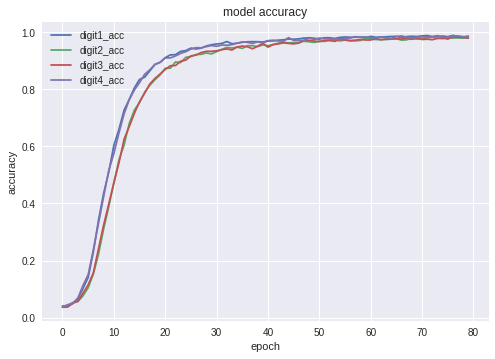

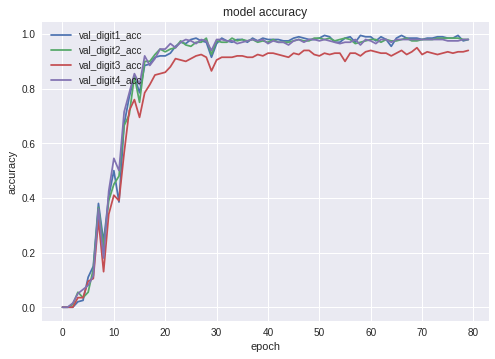

In [9]:
plt.plot(train_history.history['digit1_categorical_accuracy'])
plt.plot(train_history.history['digit2_categorical_accuracy'])
plt.plot(train_history.history['digit3_categorical_accuracy'])
plt.plot(train_history.history['digit4_categorical_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['digit1_acc', 'digit2_acc', 'digit3_acc', 'digit4_acc'], loc='upper left')
plt.show()


plt.plot(train_history.history['val_digit1_categorical_accuracy'])
plt.plot(train_history.history['val_digit2_categorical_accuracy'])
plt.plot(train_history.history['val_digit3_categorical_accuracy'])
plt.plot(train_history.history['val_digit4_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_digit1_acc', 'val_digit2_acc', 'val_digit3_acc', 'val_digit4_acc'], loc='upper left')
plt.show()

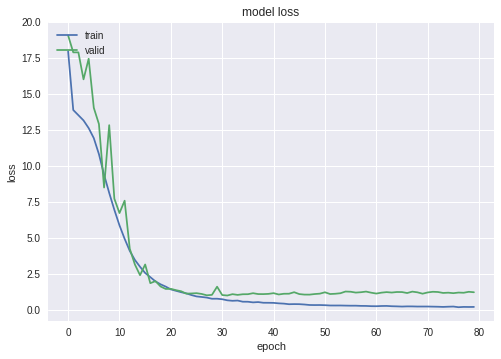

In [10]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



Loading test data...
0:


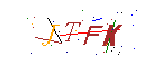

正確解答: JTFK
預測結果: JTFK
1:


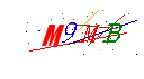

正確解答: M9MB
預測結果: M9MB
2:


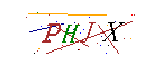

正確解答: PHJX
預測結果: PHJX
3:


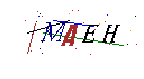

正確解答: MAEH
預測結果: MAEH
4:


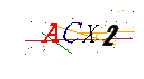

正確解答: ACX2
預測結果: ACX2
5:


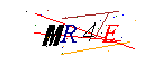

正確解答: MR4E
預測結果: MR4E
6:


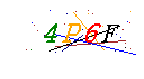

正確解答: 4P6F
預測結果: 4P6F
7:


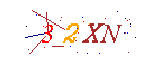

正確解答: 32XN
預測結果: 32XN
8:


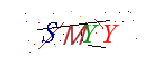

正確解答: SMYY
預測結果: SMYY
9:


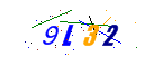

正確解答: 9L32
預測結果: 9L32
10:


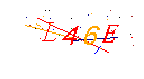

正確解答: L46E
預測結果: L46E
11:


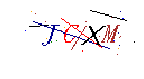

正確解答: JCXM
預測結果: JCXM
12:


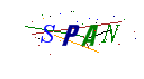

正確解答: SPAN
預測結果: SPAN
13:


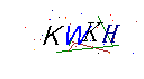

正確解答: KWKH
預測結果: KWKH
14:


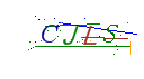

正確解答: CJLS
預測結果: CJLS
15:


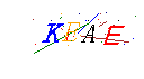

正確解答: KEAE
預測結果: KFAE
16:


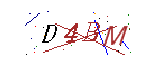

正確解答: D4BM
預測結果: D4BM
17:


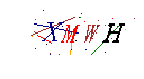

正確解答: XMWH
預測結果: XMWH
18:


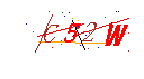

正確解答: C52W
預測結果: 252W
19:


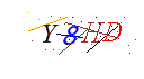

正確解答: Y8HD
預測結果: Y8HD
20:


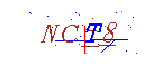

正確解答: NCT8
預測結果: NCT8
21:


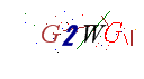

正確解答: G2WG
預測結果: G2WG
22:


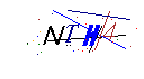

正確解答: NTH4
預測結果: NTH4
23:


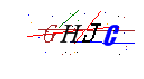

正確解答: GHJC
預測結果: GHJC
24:


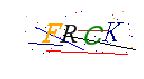

正確解答: FRCK
預測結果: FRCK
25:


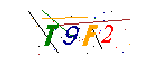

正確解答: T9F2
預測結果: T9F2
26:


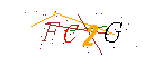

正確解答: FC2G
預測結果: FC2G
27:


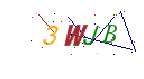

正確解答: 3WJB
預測結果: 3WJB
28:


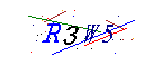

正確解答: R3W5
預測結果: R3W5
29:


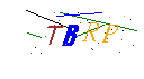

正確解答: TBRP
預測結果: TBRP
30:


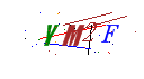

正確解答: VM2F
預測結果: VMTF
31:


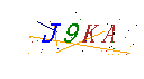

正確解答: J9KA
預測結果: J9KA
32:


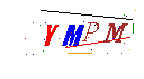

正確解答: VMPM
預測結果: VMPM
33:


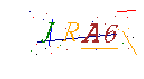

正確解答: JRA6
預測結果: JRA6
34:


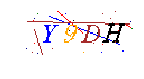

正確解答: Y9DH
預測結果: Y9DH
35:


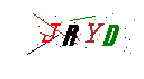

正確解答: JRYD
預測結果: JRYD
36:


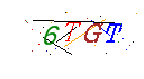

正確解答: 6TGT
預測結果: 6TGT
37:


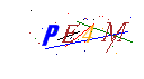

正確解答: PE4M
預測結果: PEJM
38:


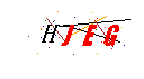

正確解答: HJEG
預測結果: HJEG
39:


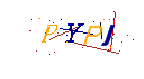

正確解答: PYPJ
預測結果: PYPJ
40:


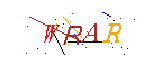

正確解答: WRAR
預測結果: WRAR
41:


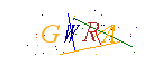

正確解答: GWRA
預測結果: GWRA
42:


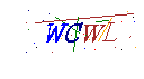

正確解答: WCWL
預測結果: WCWL
43:


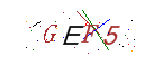

正確解答: GEF5
預測結果: GEF5
44:


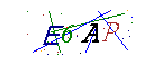

正確解答: E6AP
預測結果: E6AP
45:


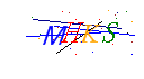

正確解答: MHKS
預測結果: MHKS
46:


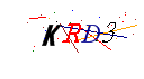

正確解答: KRD3
預測結果: KRD3
47:


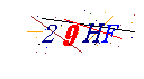

正確解答: 29HF
預測結果: 29HF
48:


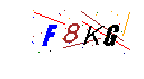

正確解答: F8KG
預測結果: F8KG
49:


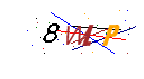

正確解答: 8WLP
預測結果: 8WLP
50:


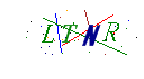

正確解答: LTNR
預測結果: HTNR
51:


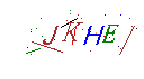

正確解答: JKHE
預測結果: JKHE
52:


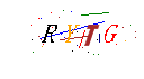

正確解答: RYTG
預測結果: RYTG
53:


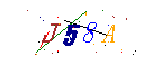

正確解答: J58A
預測結果: J58A
54:


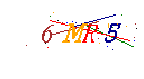

正確解答: 6MR5
預測結果: 6MR5
55:


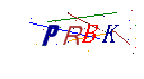

正確解答: PRBK
預測結果: PRBK
56:


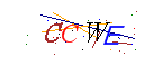

正確解答: CCWE
預測結果: CCWE
57:


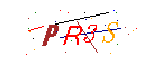

正確解答: PR3S
預測結果: PR3S
58:


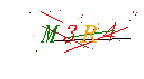

正確解答: M3B4
預測結果: M3R4
59:


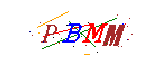

正確解答: PBMM
預測結果: PBMM
60:


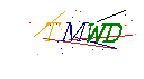

正確解答: TMWD
預測結果: TMWD
61:


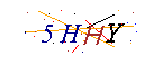

正確解答: 5HHY
預測結果: 5HHY
62:


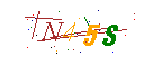

正確解答: N45S
預測結果: N45S
63:


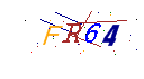

正確解答: FR64
預測結果: FR64
64:


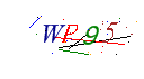

正確解答: WP95
預測結果: WP95
65:


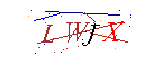

正確解答: LWJX
預測結果: LWJX
66:


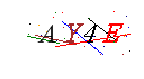

正確解答: AY4E
預測結果: AY4E
67:


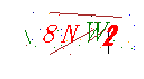

正確解答: 8NW2
預測結果: 8NW2
68:


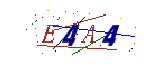

正確解答: E4A4
預測結果: E4A4
69:


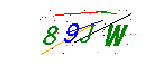

正確解答: 89JW
預測結果: 89JW
70:


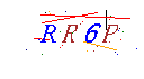

正確解答: RR6P
預測結果: RR6P
71:


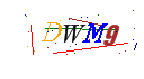

正確解答: DWM9
預測結果: DWM9
72:


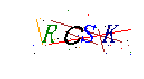

正確解答: RCSK
預測結果: RCSK
73:


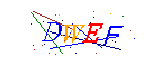

正確解答: DWEF
預測結果: DWEF
74:


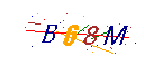

正確解答: B68M
預測結果: B68M
75:


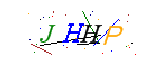

正確解答: JHHP
預測結果: JHHP
76:


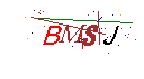

正確解答: BMSJ
預測結果: BMSJ
77:


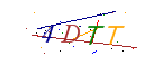

正確解答: 4DTT
預測結果: 4DTT
78:


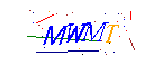

正確解答: MWMT
預測結果: MWMT
79:


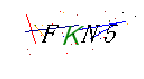

正確解答: FKN5
預測結果: FKN5
80:


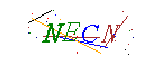

正確解答: NERCN
預測結果: NECN
81:


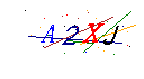

正確解答: A2XJ
預測結果: A2XJ
82:


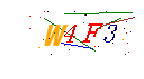

正確解答: W4F3
預測結果: W4F3
83:


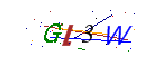

正確解答: GL3W
預測結果: GL3W
84:


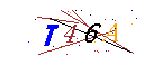

正確解答: T46A
預測結果: T46A
85:


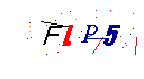

正確解答: FLP5
預測結果: FLP5
86:


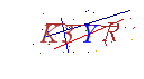

正確解答: K3YR
預測結果: K3YR
87:


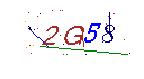

正確解答: 2Q58
預測結果: 2G58
88:


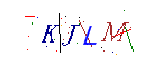

正確解答: KJLM
預測結果: KJLM
89:


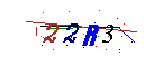

正確解答: 22R3
預測結果: 22R3
90:


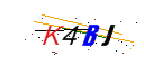

正確解答: K4BJ
預測結果: K4BJ
91:


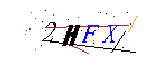

正確解答: 2HFX
預測結果: 2HFX
92:


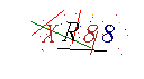

正確解答: XR88
預測結果: XR88
93:


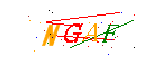

正確解答: NGAF
預測結果: NGAF
94:


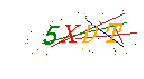

正確解答: 5XDT
預測結果: 5XDT
95:


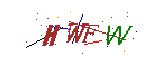

正確解答: HWEW
預測結果: HWFW
96:


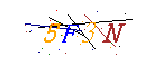

正確解答: 5F3N
預測結果: 5F3N
97:


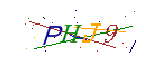

正確解答: PHJ9
預測結果: PHJ9
98:


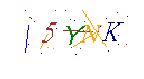

正確解答: 5YNK
預測結果: 5YNK
99:


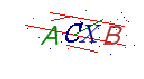

正確解答: ACXB
預測結果: ACXB
100:


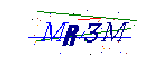

正確解答: MR3M
預測結果: MR3M
101:


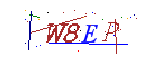

正確解答: W8ER
預測結果: W8EP
102:


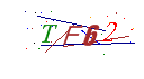

正確解答: TF62
預測結果: TF62
103:


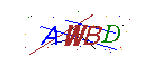

正確解答: AWBD
預測結果: AWBD
104:


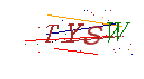

正確解答: TYSW
預測結果: TYSW
105:


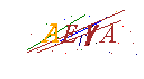

正確解答: AEVA
預測結果: AEYA
106:


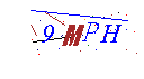

正確解答: 9MPH
預測結果: 9MPH
107:


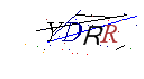

正確解答: YDRR
預測結果: YDRR
108:


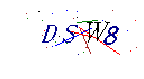

正確解答: DSW8
預測結果: DSW8
109:


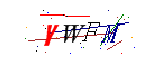

正確解答: VWFM
預測結果: YWFM
110:


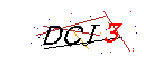

正確解答: DCJ3
預測結果: DCJ3
111:


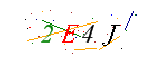

正確解答: 2E4J
預測結果: 2E4J
112:


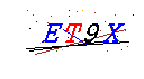

正確解答: ET9X
預測結果: ET9X
113:


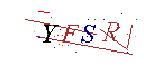

正確解答: YFSR
預測結果: YFSR
114:


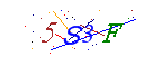

正確解答: 5S3F
預測結果: 5S3F
115:


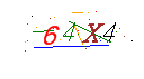

正確解答: 64X4
預測結果: 64X4
116:


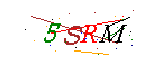

正確解答: 5SRM
預測結果: 5SRM
117:


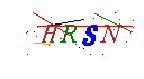

正確解答: HRSN
預測結果: HRSN
118:


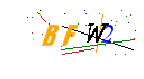

正確解答: BFW2
預測結果: BFW2
119:


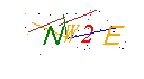

正確解答: NW2E
預測結果: NW2E
120:


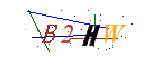

正確解答: B2HW
預測結果: B2HW
121:


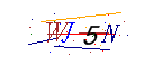

正確解答: WJ5N
預測結果: WJ5N
122:


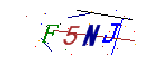

正確解答: F5NJ
預測結果: F5NJ
123:


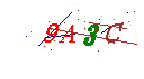

正確解答: 9A3C
預測結果: 9A3C
124:


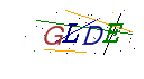

正確解答: GLDE
預測結果: GLDE
125:


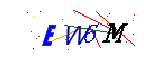

正確解答: EW6M
預測結果: EW6M
126:


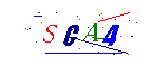

正確解答: SGA4
預測結果: SCA4
127:


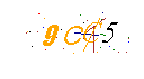

正確解答: 9CC5
預測結果: 9CC5
128:


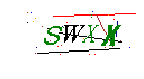

正確解答: SWXX
預測結果: SWXX
129:


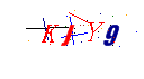

正確解答: KJY9
預測結果: KJY9
130:


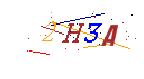

正確解答: 2H3A
預測結果: 2H3A
131:


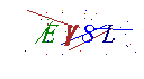

正確解答: EY8L
預測結果: EY8L
132:


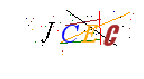

正確解答: JCFC
預測結果: JCEC
133:


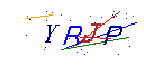

正確解答: YRJP
預測結果: YRJP
134:


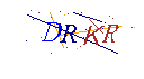

正確解答: DRKR
預測結果: DRKR
135:


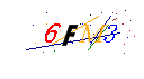

正確解答: 6FN3
預測結果: 6FM3
136:


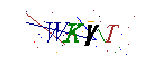

正確解答: WKVT
預測結果: WKYT
137:


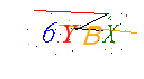

正確解答: 6YBX
預測結果: 6YBX
138:


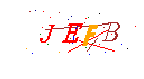

正確解答: JE5B
預測結果: JEFB
139:


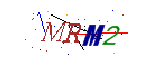

正確解答: MRM2
預測結果: MRM2
140:


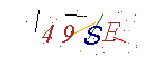

正確解答: 49SE
預測結果: 49SE
141:


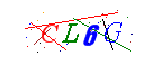

正確解答: CL6G
預測結果: CL6G
142:


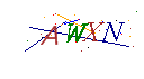

正確解答: AWXN
預測結果: AWXN
143:


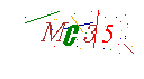

正確解答: MC35
預測結果: MC35
144:


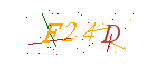

正確解答: F24D
預測結果: F24D
145:


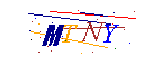

正確解答: MTNY
預測結果: MTNY
146:


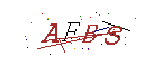

正確解答: AFBS
預測結果: AFBS
147:


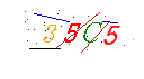

正確解答: 35C5
預測結果: 35C5
148:


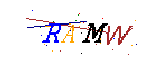

正確解答: RAMW
預測結果: RAMW
149:


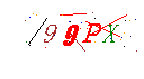

正確解答: 99PX
預測結果: 99PX
150:


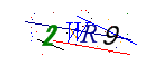

正確解答: 2WR9
預測結果: 2WR9
151:


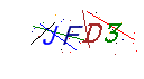

正確解答: JFD3
預測結果: JFD3
152:


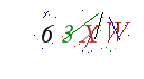

正確解答: 63XW
預測結果: 63XW
153:


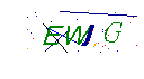

正確解答: EWJG
預測結果: EWJG
154:


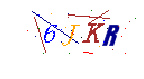

正確解答: 6JKR
預測結果: 6JKR
155:


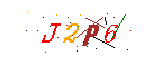

正確解答: J2P6
預測結果: J2P6
156:


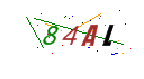

正確解答: 84AL
預測結果: 84AL
157:


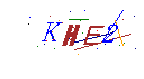

正確解答: KHE2
預測結果: KHE2
158:


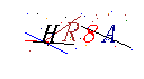

正確解答: HR8A
預測結果: HR8A
159:


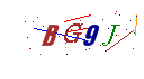

正確解答: BG9J
預測結果: BG9J
160:


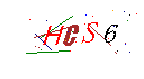

正確解答: HCS6
預測結果: HCS6
161:


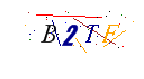

正確解答: B2TE
預測結果: B2TF
162:


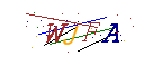

正確解答: WJFA
預測結果: WJFA
163:


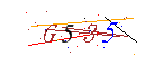

正確解答: G535
預測結果: G535
164:


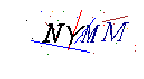

正確解答: NYMM
預測結果: NYMM
165:


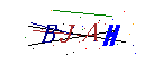

正確解答: RJAH
預測結果: BJAH
166:


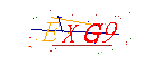

正確解答: EXG9
預測結果: EXG9
167:


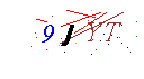

正確解答: 9JYT
預測結果: 9JYT
168:


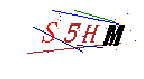

正確解答: S5HM
預測結果: S5HM
169:


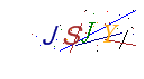

正確解答: JSJY
預測結果: JSJY
170:


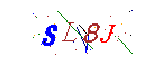

正確解答: SL8J
預測結果: SL8J
171:


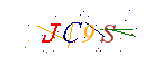

正確解答: JC9S
預測結果: JC9S
172:


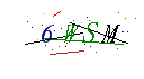

正確解答: 6WSM
預測結果: 6WSM
173:


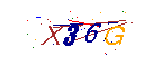

正確解答: X36G
預測結果: X36G
174:


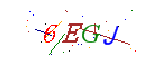

正確解答: 6EGJ
預測結果: 6EGJ
175:


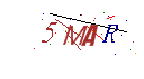

正確解答: 5-Mar
預測結果: 5M9R
176:


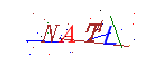

正確解答: NATL
預測結果: NATL
177:


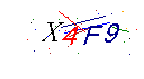

正確解答: X4F9
預測結果: X4F9
178:


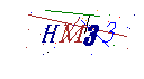

正確解答: HM33
預測結果: HM33
179:


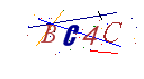

正確解答: BC4C
預測結果: BC4C
180:


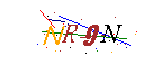

正確解答: NR9N
預測結果: NR9N
181:


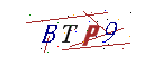

正確解答: BTP9
預測結果: BTP9
182:


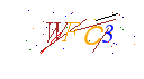

正確解答: WFC3
預測結果: WFC3
183:


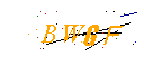

正確解答: BW8F
預測結果: BWGF
184:


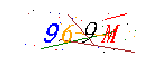

正確解答: 969M
預測結果: 969M
185:


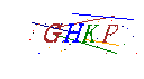

正確解答: GHKP
預測結果: GHKP
186:


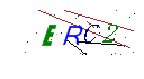

正確解答: ERC2
預測結果: ERC2
187:


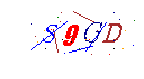

正確解答: S9GD
預測結果: S9GD
188:


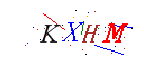

正確解答: KXHM
預測結果: KXHM
189:


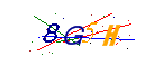

正確解答: 8G5H
預測結果: 8G5H
190:


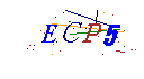

正確解答: ECP5
預測結果: ECP5
191:


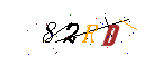

正確解答: 82RD
預測結果: 82RD
192:


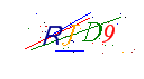

正確解答: RJD9
預測結果: RJD9
193:


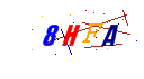

正確解答: 8HFA
預測結果: 8HFA
194:


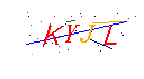

正確解答: KYJL
預測結果: KYJL
195:


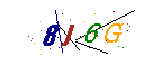

正確解答: 8J6G
預測結果: 8J6G
196:


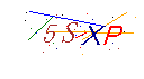

正確解答: 5SXP
預測結果: 5SXP
197:


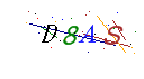

正確解答: D8AS
預測結果: D8AS
198:


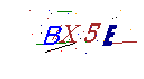

正確解答: BX5E
預測結果: BX5E
199:


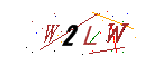

正確解答: W2LW
預測結果: W2LW
---------------------------
digits model correct_rate:89.5000%
digit1 correct_rate:98.0000%
digit2 correct_rate:98.0000%
digit3 correct_rate:94.0000%
digit4 correct_rate:98.0000%


In [11]:
print("Loading test data...")



prediction = model.predict(vali_data)
testcsv = open('fami_valid_set.csv', 'r', encoding = 'utf8')
test_label = [row[1] for row in csv.reader(testcsv)]

total = 200
correct = 0
correct_digit =  [0 for _ in range(4)]

for i in range(total):
    print(str(i) + ":")
    file = "valid/" + str(i+1) + ".jpg"
    img = plt.imread(file)
    figure = plt.figure(figsize=(2,4)) # 調整顯示圖片的大小
    #img = cv2.imread("test/1.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    allequal = True
    pred_result = ""
    true_ans = ""
    
    for char in range(4):
        pred_result += LETTERSTRN[np.argmax(prediction[char][i])]
        if LETTERSTRN[np.argmax(prediction[char][i])] == test_label[i][char]:
            correct_digit[char] += 1
        else:
            allequal = False
    
    print("正確解答: " + test_label[i])
    print("預測結果: " + pred_result)

    if allequal:
        correct += 1


print("---------------------------")
print("digits model correct_rate:{:.4f}%".format(correct/total*100))
for i in range(4):  
    print("digit{:d} correct_rate:{:.4f}%".format(i+1, correct_digit[i]/total*100)) 




In [0]:
#---------------------------------下載數據集--------------------------------------------------

def Download():
    !mkdir a

    import shutil
    import requests
    import time
    SAVEPATH = "a/"
    url = 'https://www.famiticket.com.tw/ValidateCode/ValidateCode.aspx?flag='
    for i in range(1,20):
        response = requests.get(url, stream=True)
        with open(SAVEPATH + str(i) + '.jpg', 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response
        time.sleep(0.5)
    
#https://www.famiticket.com.tw/ValidateCode/ValidateCode.aspx?flag=
#https://www.artsticket.com.tw/CKSCC2005/Pic.aspx?TYPE=HomeLogin&ts=
#https://cas.baidu.com/?action=image2&appid=285&key=
#https://ecvip.pchome.com.tw/ecapi/member/v2.1/member/login/authcode?

mkdir: cannot create directory ‘a’: File exists


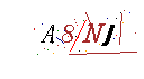

     A8NJ




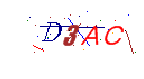

     D3AC




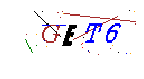

     GET6




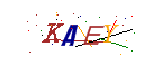

     KAEY




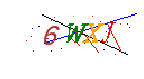

     6WXJ




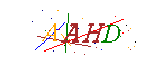

     AAHD




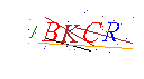

     BKCR




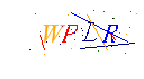

     WPLR




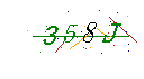

     368J




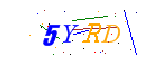

     5YRD




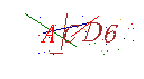

     ACD6




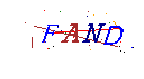

     FAND




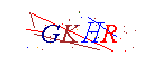

     GKHR




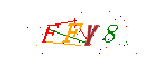

     FFY8




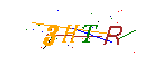

     3HTR




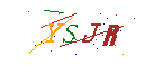

     YSJR




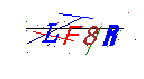

     LF8R




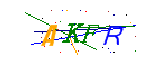

     AKFR




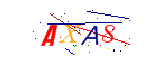

     AXA8




In [0]:
#testcsv = open('fami_valid_set.csv', 'r', encoding = 'utf8')
#test_label = [row[1] for row in csv.reader(testcsv)]

Download()


test_data = np.stack([np.array(Image.open('a/' + str(i) + ".jpg"))/255.0 for i in range(1, 20)])
prediction_t = model.predict(test_data)



for i in range(19):
    file = "a/" + str(i+1) + ".jpg"
    img = plt.imread(file)
    figure = plt.figure(figsize=(2,4)) # 調整顯示圖片的大小
    #img = cv2.imread("test/1.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    ans = ""
    for char in range(4):
        ans += LETTERSTRN[np.argmax(prediction_t[char][i])]
    print("     "+ans)
    print("\n")


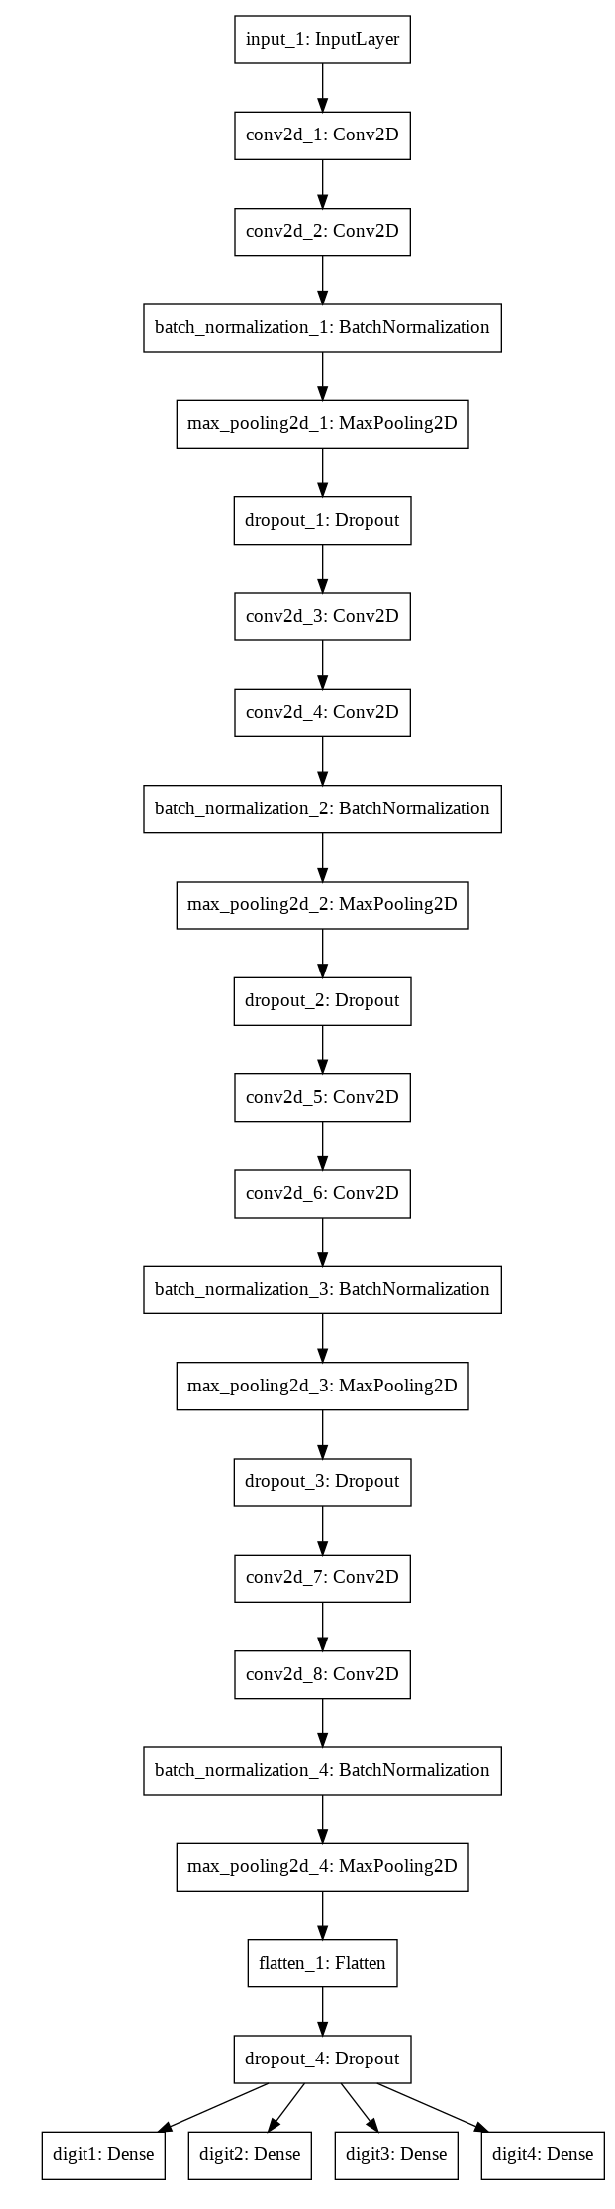

In [12]:

plot_model(model, to_file='model.png')
img = plt.imread("model.png")
figure = plt.figure(figsize=(20, 40)) # 調整顯示圖片的大小
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
files.download('model.png') 

# 問題探討:

In [0]:
score = model.evaluate(vali_data, vali_label)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

200/200 [==============================] - 0s 921us/step
Test loss: 1.0384793663024903
Test accuracy: 0.08059108436107636


# 圖片預處理，僅單純做測試

Working with 4000 images
Image examples: 
1685.jpg


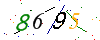

2164.jpg
1685.jpg
2665.jpg
2764.jpg
2592.jpg


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


195.jpg
2531.jpg
2364.jpg
536.jpg
3674.jpg
3193.jpg
372.jpg
1601.jpg
3152.jpg
2582.jpg
170.jpg
3539.jpg
1092.jpg
244.jpg
1750.jpg
3411.jpg
136.jpg
437.jpg
3055.jpg
3768.jpg
413.jpg
3851.jpg
1152.jpg
3905.jpg
2664.jpg
2925.jpg
2609.jpg
247.jpg
3202.jpg
1295.jpg
1451.jpg
3506.jpg
2103.jpg
192.jpg
3664.jpg
3338.jpg
577.jpg
979.jpg
1172.jpg
3118.jpg
946.jpg
1751.jpg
2203.jpg
142.jpg
2160.jpg
2309.jpg
2599.jpg
3562.jpg
1942.jpg
2159.jpg
416.jpg
1612.jpg
568.jpg
981.jpg
2134.jpg
65.jpg
1349.jpg
1126.jpg
2064.jpg
2747.jpg
1236.jpg
3547.jpg
3948.jpg
3274.jpg
1470.jpg
2718.jpg
424.jpg
2155.jpg
3520.jpg
1073.jpg
3657.jpg
687.jpg
3372.jpg
1388.jpg
1662.jpg
3153.jpg
407.jpg
1400.jpg
2849.jpg
3583.jpg
2978.jpg
2101.jpg
1904.jpg
3171.jpg
1063.jpg
3296.jpg
152.jpg
2821.jpg
1950.jpg
2628.jpg
2380.jpg
3877.jpg
2564.jpg
3176.jpg
3772.jpg
1957.jpg
2975.jpg
86.jpg
2797.jpg
1040.jpg
7.jpg
3652.jpg
9.jpg
2987.jpg
2423.jpg
1211.jpg
1693.jpg
3999.jpg
1716.jpg
3840.jpg
2670.jpg
58.jpg
3402.jpg
3490.jpg
138.jpg

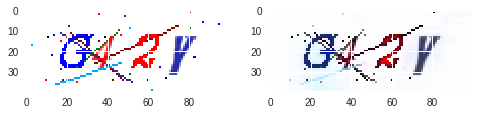

In [0]:
#------------------------------------------去噪音--------------------------------------------------------
#------------------------------------------data----------------------------------------------------------
folder = "data/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(1, 2):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=80, height=40))

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)


for _file in train_files:
  print(_file)
  img = cv2.imread("data/"+_file)
  dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 25, 7, 21)
  plt.subplot(121)
  plt.imshow(img)
  plt.subplot(122)
  plt.imshow(dst)
  cv2.imwrite("data/"+_file, dst)

Working with 200 images
Image examples: 
58.jpg


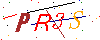

195.jpg
170.jpg
136.jpg


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


192.jpg
142.jpg
65.jpg
152.jpg
86.jpg
7.jpg
9.jpg
58.jpg
138.jpg
89.jpg
68.jpg
188.jpg
182.jpg
12.jpg
137.jpg
119.jpg
40.jpg
133.jpg
157.jpg
155.jpg
52.jpg
180.jpg
46.jpg
175.jpg
178.jpg
129.jpg
60.jpg
51.jpg
81.jpg
193.jpg
189.jpg
108.jpg
38.jpg
21.jpg
61.jpg
26.jpg
72.jpg
16.jpg
92.jpg
110.jpg
143.jpg
168.jpg
100.jpg
43.jpg
8.jpg
149.jpg
24.jpg
91.jpg
85.jpg
55.jpg
36.jpg
59.jpg
54.jpg
97.jpg
3.jpg
33.jpg
19.jpg
169.jpg
186.jpg
125.jpg
18.jpg
44.jpg
183.jpg
172.jpg
196.jpg
118.jpg
76.jpg
71.jpg
99.jpg
141.jpg
174.jpg
197.jpg
145.jpg
56.jpg
117.jpg
66.jpg
128.jpg
93.jpg
164.jpg
184.jpg
32.jpg
167.jpg
165.jpg
14.jpg
57.jpg
69.jpg
200.jpg
177.jpg
102.jpg
106.jpg
29.jpg
154.jpg
153.jpg
28.jpg
199.jpg
124.jpg
45.jpg
80.jpg
17.jpg
10.jpg
127.jpg
132.jpg
77.jpg
70.jpg
4.jpg
34.jpg
37.jpg
5.jpg
23.jpg
82.jpg
74.jpg
144.jpg
98.jpg
83.jpg
159.jpg
13.jpg
198.jpg
148.jpg
162.jpg
122.jpg
87.jpg
147.jpg
146.jpg
94.jpg
90.jpg
73.jpg
139.jpg
95.jpg
107.jpg
191.jpg
30.jpg
104.jpg
63.jpg
62.jpg
11.jpg

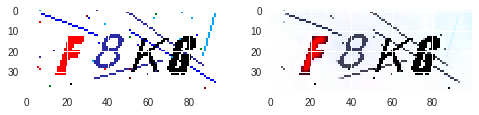

In [0]:
#------------------------------------------去噪音--------------------------------------------------------
#------------------------------------------valid----------------------------------------------------------

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

folder = "valid/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(10, 11):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=85, height=26))

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)


for _file in train_files:
  print(_file)
  img = cv2.imread("valid/"+_file)
  dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 25, 7, 21)
  plt.subplot(121)
  plt.imshow(img)
  plt.subplot(122)
  plt.imshow(dst)
  cv2.imwrite("valid/"+_file, dst)


In [0]:
#----------------------------------------圖片二值化------------------------------------------------------
#------------------------------------------data----------------------------------------------------------
from PIL import Image  
# 二值化处理  
for _file in train_files:   
    image=Image.open("a/"+_file)  
    # 灰度图  
    lim=image.convert('L')    
    # 灰度阈值设为165，低于这个值的点全部填白色  
    threshold=200  
    table=[]  
    for j in range(256):  
        if j<threshold:  
            table.append(0)  
        else:  
            table.append(1)  
    bim=lim.point(table,'1') 
    bim.save("x.jpg")  

In [0]:
#----------------------------------------圖片二值化-------------------------------------------------------
#------------------------------------------valid----------------------------------------------------------
from PIL import Image  
# 二值化处理  
for _file in train_files:   
    image=Image.open("valid/"+_file)  
    # 灰度图  
    lim=image.convert('L')    
    # 灰度阈值设为165，低于这个值的点全部填白色  
    threshold=20
    table=[] 
    for j in range(256):  
        if j<threshold:  
            table.append(0)  
        else:  
            table.append(1)  
    bim=lim.point(table,'1')  
    bim.save("valid/"+_file)  

# **曾經嘗試過但尚未成功的區塊**

In [0]:
#------------------------------one hot encoding----------------------------------
char_indices = dict((c, i) for i, c in enumerate(LETTERSTR))
def captcha_to_vec(captcha):
    vector1 = np.zeros(1*36)
    vector2 = np.zeros(1*36)
    vector3 = np.zeros(1*36)
    vector4 = np.zeros(1*36)
    
    vector1[char_indices[captcha[0]]] = 1
    vector2[char_indices[captcha[1]]] = 1
    vector3[char_indices[captcha[2]]] = 1
    vector4[char_indices[captcha[3]]] = 1
            
    vector=[]
    vector.append(vector1)
    vector.append(vector2)
    vector.append(vector3)
    vector.append(vector4)
           
    #for i, ch in enumerate(captcha[0]):
    #  idex = i*36 + char_indices[ch]
    #  vector[idex] = 1
    return vector

In [0]:
print(captcha_to_vec('jczy'))

In [0]:
valid_img_list = []
for item in os.listdir("valid/"): 
      valid_img_list.append(item)
np.random.shuffle(valid_img_list)
print(valid_img_list)

In [0]:
valid_img_list = []
for item in os.listdir("valid/"): 
      valid_img_list.append(item)
np.random.shuffle(valid_img_list)
print(valid_img_list)

In [0]:
x = np.zeros((len(img_list), 40, 80, 3), dtype=np.uint8)

y = np.zeros((len(img_list), 4*36), dtype=np.uint8)

a = []
valicsv = open('ba_train_set.csv', 'r', encoding = 'utf8')
data=list(csv.reader(valicsv))

for i, img in enumerate(img_list):
  img_path = "data/" +  img
  raw_img = image.load_img(img_path, target_size=(40, 80))
  x[i] = image.img_to_array(raw_img)
  a.append(captcha_to_vec(data[i][1]))

  #print(a)
  

In [0]:
vx = np.zeros((len(valid_img_list), 40, 80, 3), dtype=np.uint8)

vy = np.zeros((len(valid_img_list), 4*36), dtype=np.uint8)
b = []
valicsv = open('ba_valid_set.csv', 'r', encoding = 'utf8')
data=list(csv.reader(valicsv))

for i, img in enumerate(valid_img_list):
  img_path = "valid/" +  img
  raw_img = image.load_img(img_path, target_size=(40, 80))
  vx[i] = image.img_to_array(raw_img)
  b.append(captcha_to_vec(data[i][1]))

  #print(i)
  #

# 載入模型(會錯誤)

Loading test data...
0:


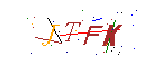

正確解答: JTFK
預測結果: WSC2
1:


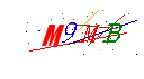

正確解答: M9MB
預測結果: WSC2
2:


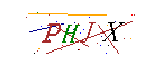

正確解答: PHJX
預測結果: WSC2
3:


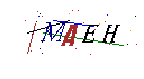

正確解答: MAEH
預測結果: WSC2
4:


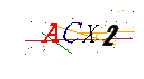

正確解答: ACX2
預測結果: WSC2
5:


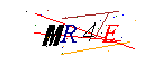

正確解答: MR4E
預測結果: WSC2
6:


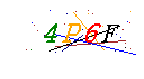

正確解答: 4P6F
預測結果: WSC2
7:


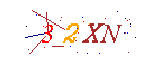

正確解答: 32XN
預測結果: WSC2
8:


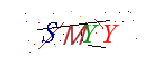

正確解答: SMYY
預測結果: WSC2
9:


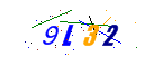

正確解答: 9L32
預測結果: WSC2
10:


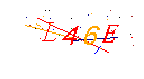

正確解答: L46E
預測結果: WSC2
11:


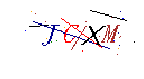

正確解答: JCXM
預測結果: WSCX
12:


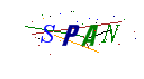

正確解答: SPAN
預測結果: WSC2
13:


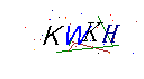

正確解答: KWKH
預測結果: WSC2
14:


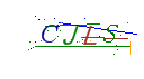

正確解答: CJLS
預測結果: WSC2
15:


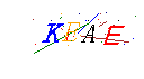

正確解答: KEAE
預測結果: WSC2
16:


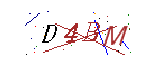

正確解答: D4BM
預測結果: WSC2
17:


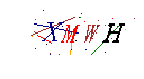

正確解答: XMWH
預測結果: WSC2
18:


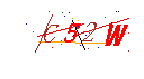

正確解答: C52W
預測結果: WSC2
19:


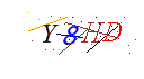

正確解答: Y8HD
預測結果: WSC2
20:


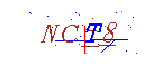

正確解答: NCT8
預測結果: WPC2
21:


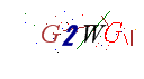

正確解答: G2WG
預測結果: WSC2
22:


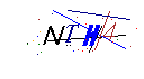

正確解答: NTH4
預測結果: WSC2
23:


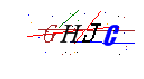

正確解答: GHJC
預測結果: WSC2
24:


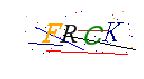

正確解答: FRCK
預測結果: WSC2
25:


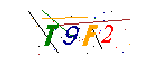

正確解答: T9F2
預測結果: WSC2
26:


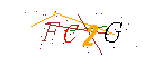

正確解答: FC2G
預測結果: WSC2
27:


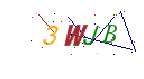

正確解答: 3WJB
預測結果: WSCX
28:


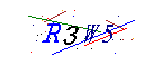

正確解答: R3W5
預測結果: WSC2
29:


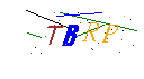

正確解答: TBRP
預測結果: WSC2
30:


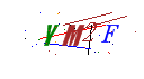

正確解答: VM2F
預測結果: WSC2
31:


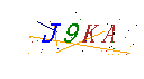

正確解答: J9KA
預測結果: WSC2
32:


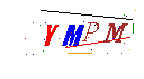

正確解答: VMPM
預測結果: WSC2
33:


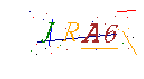

正確解答: JRA6
預測結果: WSC2
34:


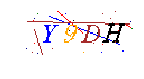

正確解答: Y9DH
預測結果: WSCX
35:


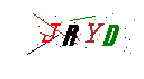

正確解答: JRYD
預測結果: WSCX
36:


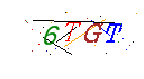

正確解答: 6TGT
預測結果: WSC2
37:


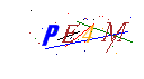

正確解答: PE4M
預測結果: WPC2
38:


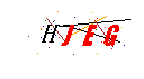

正確解答: HJEG
預測結果: WSC2
39:


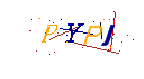

正確解答: PYPJ
預測結果: WSC2
40:


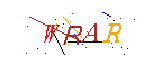

正確解答: WRAR
預測結果: WSC2
41:


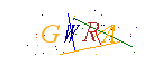

正確解答: GWRA
預測結果: WSCX
42:


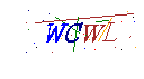

正確解答: WCWL
預測結果: WSC2
43:


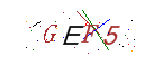

正確解答: GEF5
預測結果: WSC2
44:


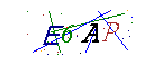

正確解答: E6AP
預測結果: WSC2
45:


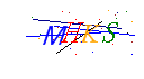

正確解答: MHKS
預測結果: WPC2
46:


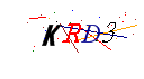

正確解答: KRD3
預測結果: WSC2
47:


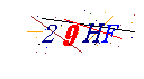

正確解答: 29HF
預測結果: WSC2
48:


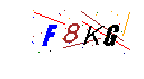

正確解答: F8KG
預測結果: WSC2
49:


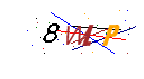

正確解答: 8WLP
預測結果: WSC2
50:


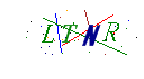

正確解答: LTNR
預測結果: WSC2
51:


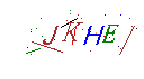

正確解答: JKHE
預測結果: WPCX
52:


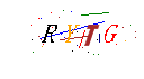

正確解答: RYTG
預測結果: WSC2
53:


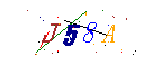

正確解答: J58A
預測結果: WSCX
54:


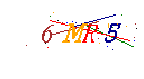

正確解答: 6MR5
預測結果: WSCX
55:


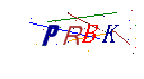

正確解答: PRBK
預測結果: WSC2
56:


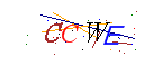

正確解答: CCWE
預測結果: WSC2
57:


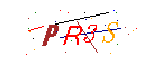

正確解答: PR3S
預測結果: WSC2
58:


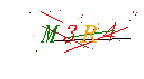

正確解答: M3B4
預測結果: WPC2
59:


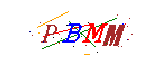

正確解答: PBMM
預測結果: WSC2
60:


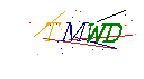

正確解答: TMWD
預測結果: WSC2
61:


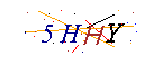

正確解答: 5HHY
預測結果: WSC2
62:


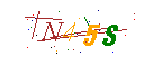

正確解答: N45S
預測結果: WSC2
63:


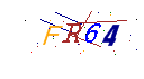

正確解答: FR64
預測結果: WSC2
64:


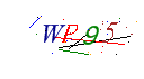

正確解答: WP95
預測結果: WSC2
65:


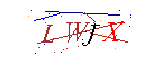

正確解答: LWJX
預測結果: WSCX
66:


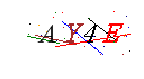

正確解答: AY4E
預測結果: WSC2
67:


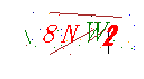

正確解答: 8NW2
預測結果: WSCX
68:


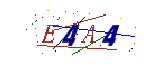

正確解答: E4A4
預測結果: WSC2
69:


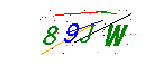

正確解答: 89JW
預測結果: WSC2
70:


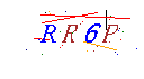

正確解答: RR6P
預測結果: WSC2
71:


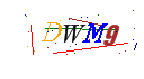

正確解答: DWM9
預測結果: WSC2
72:


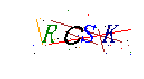

正確解答: RCSK
預測結果: WSC2
73:


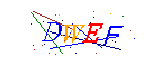

正確解答: DWEF
預測結果: WSC2
74:


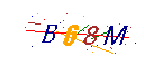

正確解答: B68M
預測結果: WSC2
75:


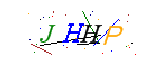

正確解答: JHHP
預測結果: WSCX
76:


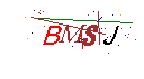

正確解答: BMSJ
預測結果: WSC2
77:


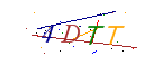

正確解答: 4DTT
預測結果: WSC2
78:


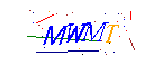

正確解答: MWMT
預測結果: WSC2
79:


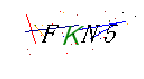

正確解答: FKN5
預測結果: WSC2
80:


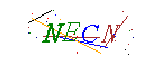

正確解答: NERCN
預測結果: WSC2
81:


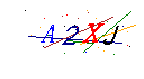

正確解答: A2XJ
預測結果: WSC2
82:


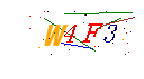

正確解答: W4F3
預測結果: WSC2
83:


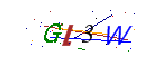

正確解答: GL3W
預測結果: WSC2
84:


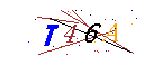

正確解答: T46A
預測結果: WSC2
85:


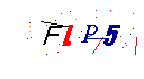

正確解答: FLP5
預測結果: WSC2
86:


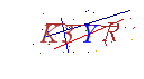

正確解答: K3YR
預測結果: WPC2
87:


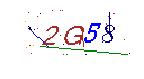

正確解答: 2Q58
預測結果: WSC2
88:


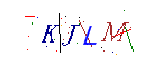

正確解答: KJLM
預測結果: WSC2
89:


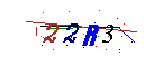

正確解答: 22R3
預測結果: WSC2
90:


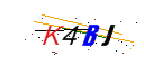

正確解答: K4BJ
預測結果: WSC2
91:


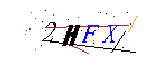

正確解答: 2HFX
預測結果: WSC2
92:


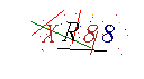

正確解答: XR88
預測結果: WPC2
93:


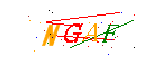

正確解答: NGAF
預測結果: WSC2
94:


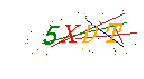

正確解答: 5XDT
預測結果: WSC2
95:


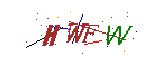

正確解答: HWEW
預測結果: WSC2
96:


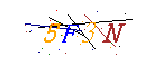

正確解答: 5F3N
預測結果: WSC2
97:


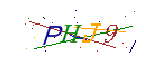

正確解答: PHJ9
預測結果: WSC2
98:


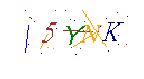

正確解答: 5YNK
預測結果: WSC2
99:


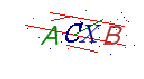

正確解答: ACXB
預測結果: WSC2
100:


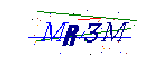

正確解答: MR3M
預測結果: WSCX
101:


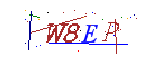

正確解答: W8ER
預測結果: WSC2
102:


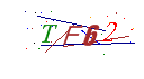

正確解答: TF62
預測結果: WSC2
103:


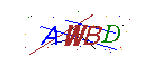

正確解答: AWBD
預測結果: WSC2
104:


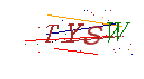

正確解答: TYSW
預測結果: WSC2
105:


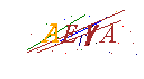

正確解答: AEVA
預測結果: WSC2
106:


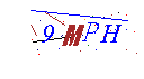

正確解答: 9MPH
預測結果: WSC2
107:


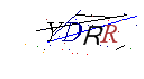

正確解答: YDRR
預測結果: WSC2
108:


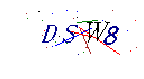

正確解答: DSW8
預測結果: WSC2
109:


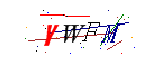

正確解答: VWFM
預測結果: WSC2
110:


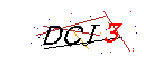

正確解答: DCJ3
預測結果: WSC2
111:


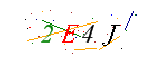

正確解答: 2E4J
預測結果: WSC2
112:


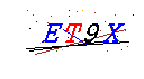

正確解答: ET9X
預測結果: WSC2
113:


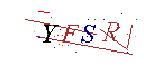

正確解答: YFSR
預測結果: WSC2
114:


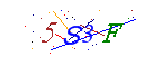

正確解答: 5S3F
預測結果: WPC2
115:


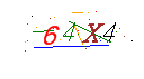

正確解答: 64X4
預測結果: WSCX
116:


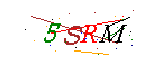

正確解答: 5SRM
預測結果: WSCX
117:


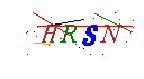

正確解答: HRSN
預測結果: WSC2
118:


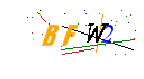

正確解答: BFW2
預測結果: WSC2
119:


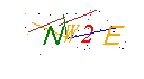

正確解答: NW2E
預測結果: WSC2
120:


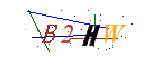

正確解答: B2HW
預測結果: WSC2
121:


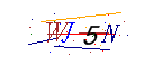

正確解答: WJ5N
預測結果: WSC2
122:


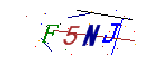

正確解答: F5NJ
預測結果: WSC2
123:


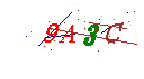

正確解答: 9A3C
預測結果: WSC2
124:


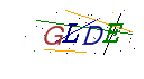

正確解答: GLDE
預測結果: WSCX
125:


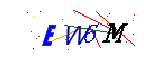

正確解答: EW6M
預測結果: WSC8
126:


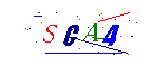

正確解答: SGA4
預測結果: WSCX
127:


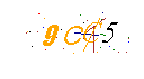

正確解答: 9CC5
預測結果: WSC2
128:


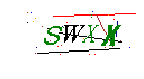

正確解答: SWXX
預測結果: WSC2
129:


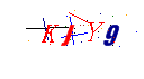

正確解答: KJY9
預測結果: WPC2
130:


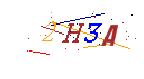

正確解答: 2H3A
預測結果: WSC2
131:


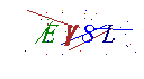

正確解答: EY8L
預測結果: WSC2
132:


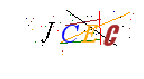

正確解答: JCFC
預測結果: WSC2
133:


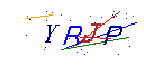

正確解答: YRJP
預測結果: WSC2
134:


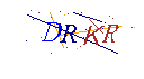

正確解答: DRKR
預測結果: WSC2
135:


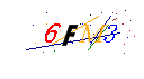

正確解答: 6FN3
預測結果: WSC2
136:


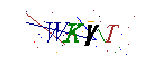

正確解答: WKVT
預測結果: WSC2
137:


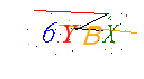

正確解答: 6YBX
預測結果: WSC2
138:


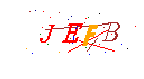

正確解答: JE5B
預測結果: WSC2
139:


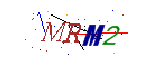

正確解答: MRM2
預測結果: WSC2
140:


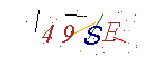

正確解答: 49SE
預測結果: WSC2
141:


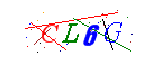

正確解答: CL6G
預測結果: WSC2
142:


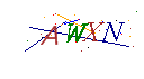

正確解答: AWXN
預測結果: WSC2
143:


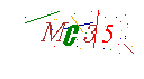

正確解答: MC35
預測結果: WSC2
144:


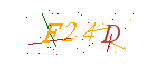

正確解答: F24D
預測結果: WSC2
145:


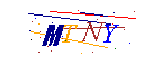

正確解答: MTNY
預測結果: WSC2
146:


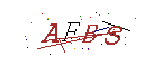

正確解答: AFBS
預測結果: WSC2
147:


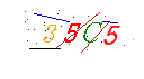

正確解答: 35C5
預測結果: WSC2
148:


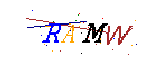

正確解答: RAMW
預測結果: WSC2
149:


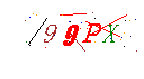

正確解答: 99PX
預測結果: WSC2
150:


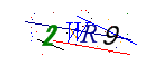

正確解答: 2WR9
預測結果: WSC2
151:


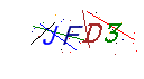

正確解答: JFD3
預測結果: WSC2
152:


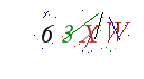

正確解答: 63XW
預測結果: WSC2
153:


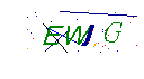

正確解答: EWJG
預測結果: WSC2
154:


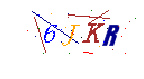

正確解答: 6JKR
預測結果: WSC2
155:


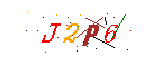

正確解答: J2P6
預測結果: WSC2
156:


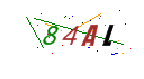

正確解答: 84AL
預測結果: WSC2
157:


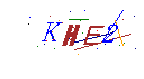

正確解答: KHE2
預測結果: WSC2
158:


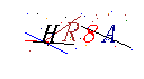

正確解答: HR8A
預測結果: WSC2
159:


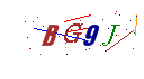

正確解答: BG9J
預測結果: WSC2
160:


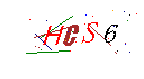

正確解答: HCS6
預測結果: WSC2
161:


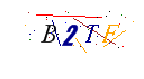

正確解答: B2TE
預測結果: WSC2
162:


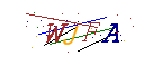

正確解答: WJFA
預測結果: WSC2
163:


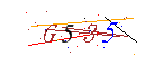

正確解答: G535
預測結果: WSC2
164:


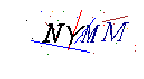

正確解答: NYMM
預測結果: WSC2
165:


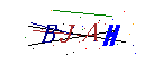

正確解答: RJAH
預測結果: WSC2
166:


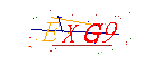

正確解答: EXG9
預測結果: WSC2
167:


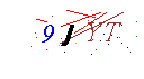

正確解答: 9JYT
預測結果: WSC2
168:


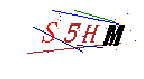

正確解答: S5HM
預測結果: WSC2
169:


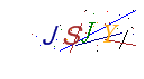

正確解答: JSJY
預測結果: WSCX
170:


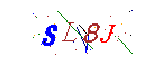

正確解答: SL8J
預測結果: WSC2
171:


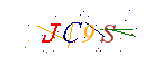

正確解答: JC9S
預測結果: WSC2
172:


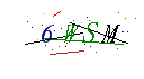

正確解答: 6WSM
預測結果: WSCX
173:


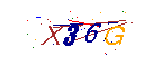

正確解答: X36G
預測結果: WPCX
174:


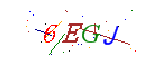

正確解答: 6EGJ
預測結果: WSC2
175:


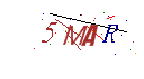

正確解答: 5-Mar
預測結果: WSC2
176:


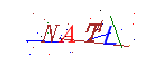

正確解答: NATL
預測結果: WCC2
177:


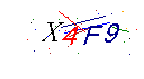

正確解答: X4F9
預測結果: WSC2
178:


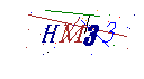

正確解答: HM33
預測結果: WSC2
179:


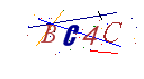

正確解答: BC4C
預測結果: WSC2
180:


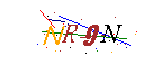

正確解答: NR9N
預測結果: WSC2
181:


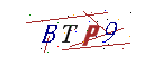

正確解答: BTP9
預測結果: WSC2
182:


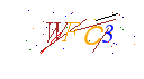

正確解答: WFC3
預測結果: WSC2
183:


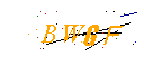

正確解答: BW8F
預測結果: WSC2
184:


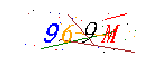

正確解答: 969M
預測結果: WSC2
185:


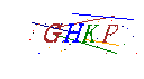

正確解答: GHKP
預測結果: WSC2
186:


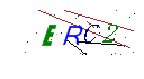

正確解答: ERC2
預測結果: WSC2
187:


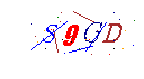

正確解答: S9GD
預測結果: WSC2
188:


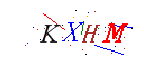

正確解答: KXHM
預測結果: WSC2
189:


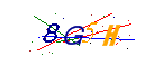

正確解答: 8G5H
預測結果: WSC2
190:


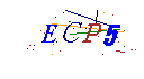

正確解答: ECP5
預測結果: WSC2
191:


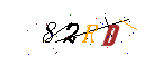

正確解答: 82RD
預測結果: WSC2
192:


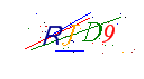

正確解答: RJD9
預測結果: WSC2
193:


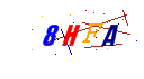

正確解答: 8HFA
預測結果: WSC2
194:


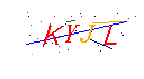

正確解答: KYJL
預測結果: WSC2
195:


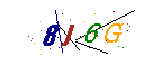

正確解答: 8J6G
預測結果: WSC2
196:


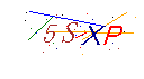

正確解答: 5SXP
預測結果: WSC2
197:


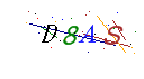

正確解答: D8AS
預測結果: WPC2
198:


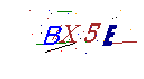

正確解答: BX5E
預測結果: WSC2
199:


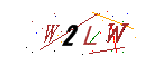

正確解答: W2LW
預測結果: WSC2
---------------------------
digits model correct_rate:0.0000%
digit1 correct_rate:5.0000%
digit2 correct_rate:2.0000%
digit3 correct_rate:2.5000%
digit4 correct_rate:4.5000%


In [0]:
from keras.models import load_model
from keras.models import Model
    
    
print("Loading test data...")


model5 = load_model("cnn_model.hdf5")
prediction = model5.predict(vali_data)
testcsv = open('fami_valid_set.csv', 'r', encoding = 'utf8')
test_label = [row[1] for row in csv.reader(testcsv)]

total = 200
correct = 0
correct_digit =  [0 for _ in range(4)]

for i in range(total):
    print(str(i) + ":")
    file = "valid/" + str(i+1) + ".jpg"
    img = plt.imread(file)
    figure = plt.figure(figsize=(2,4)) # 調整顯示圖片的大小
    #img = cv2.imread("test/1.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    allequal = True
    pred_result = ""
    true_ans = ""
    
    for char in range(4):
        pred_result += LETTERSTRN[np.argmax(prediction[char][i])]
        if LETTERSTRN[np.argmax(prediction[char][i])] == test_label[i][char]:
            correct_digit[char] += 1
        else:
            allequal = False
    
    print("正確解答: " + test_label[i])
    print("預測結果: " + pred_result)

    if allequal:
        correct += 1


print("---------------------------")
print("digits model correct_rate:{:.4f}%".format(correct/total*100))
for i in range(4):  
    print("digit{:d} correct_rate:{:.4f}%".format(i+1, correct_digit[i]/total*100)) 



